In [1]:
import os
import json
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

# A stack of all the spectra in one figure

## K-band

In [3]:
sns.set_style("ticks", {"xtick.major.size": 2, "ytick.major.size": 2})

In [4]:
sns.set_context('paper', font_scale=1.0)

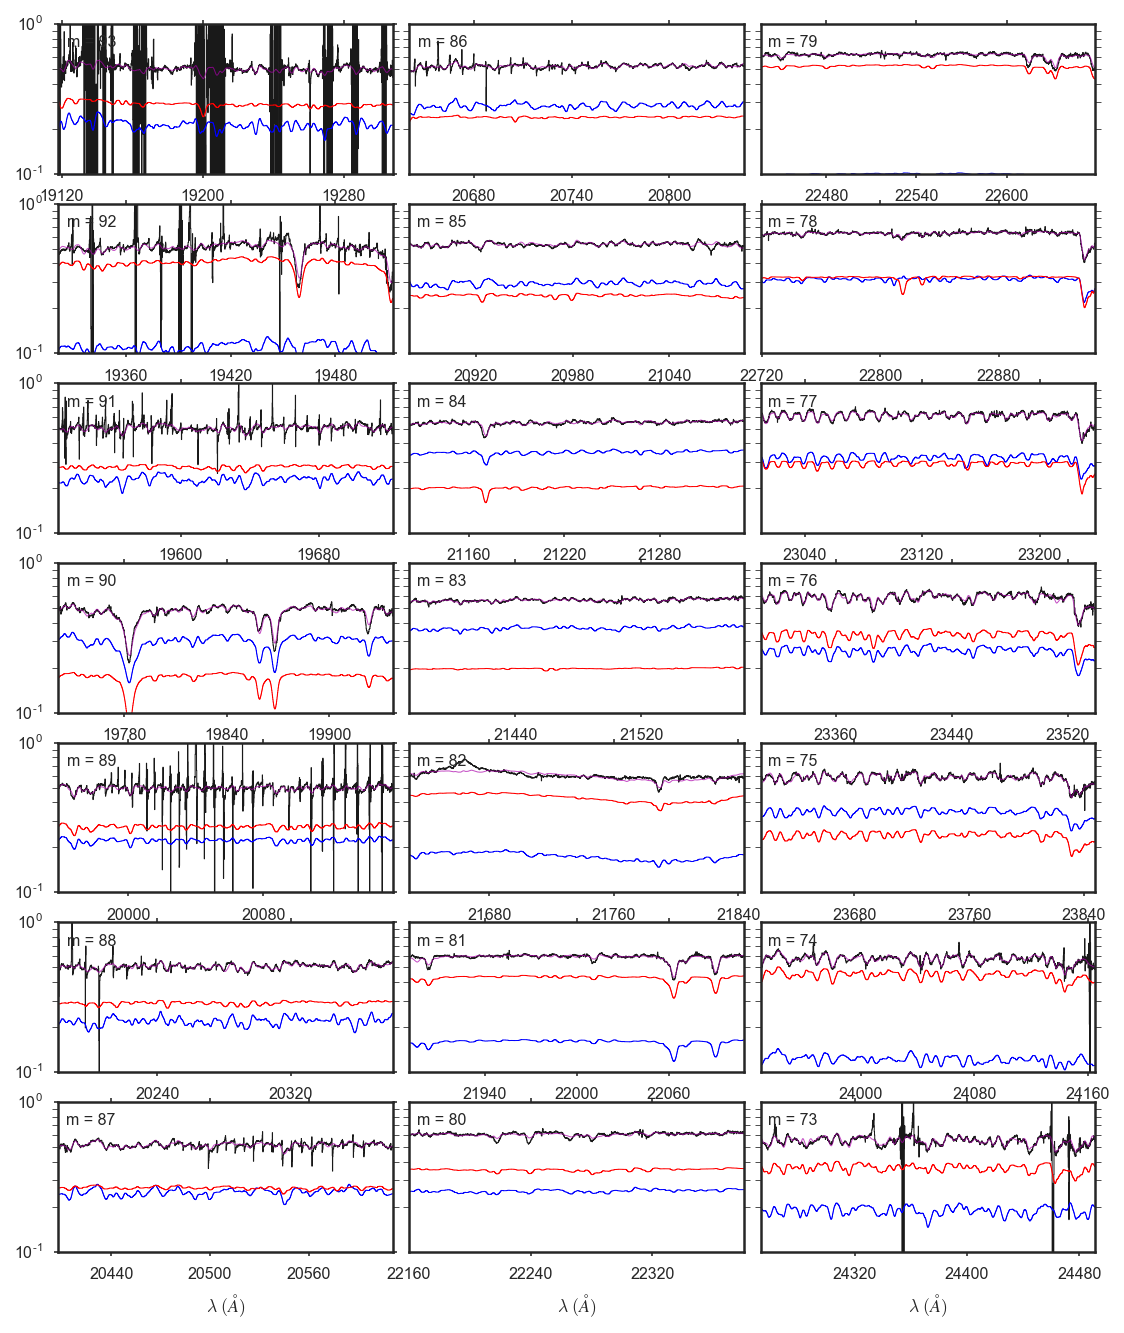

In [14]:
ms = np.arange(72, 94, 1)[::-1]
ii = -1
nrows = 7
ncols = 3

#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8.0, 11.0))

fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

for i in range(ncols):
    for j in range(nrows):
        ii += 1
        m = ms[ii]
        with open('../sf/m{:03d}/output/mix_emcee/run01/mix_spec.json'.format(m)) as f:
            dat = json.load(f)
        ax = fig.add_subplot(nrows, ncols, ncols * j + 1 + i)
        lw=0.5
        ax.step(dat['wl'], dat['data'], '-k', linewidth=lw, alpha=0.9)
        ax.plot(dat['wl'], dat['composite'], color='#AA00AA', linewidth=lw, alpha=0.7)
        ax.step(dat['wl'], dat['model2_cool'], 'b-', linewidth=lw)
        ax.step(dat['wl'], dat['model1_hot'], 'r', linewidth=lw)

        ax.text(dat['wl'][0]+5.0, 0.7, "m = {}".format(m), fontsize=8)
        
        #ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.set_yscale('log')
        ax.set_ylim(0.1, 1.0)
        ax.set_xlim(dat['wl'][0], dat['wl'][-1])
        if i > 0:
            ax.yaxis.set_major_locator(plt.NullLocator())
            ax.yaxis.set_major_formatter(plt.NullFormatter())
        
        ax.xaxis.set_major_locator(plt.MaxNLocator(4))
        if j > (nrows - 2):
            plt.xlabel(r'$\lambda \; (\AA)$')
plt.savefig('../document/figures/K_band_spectra_3x7.pdf', bbox_inches='tight')

## H-band

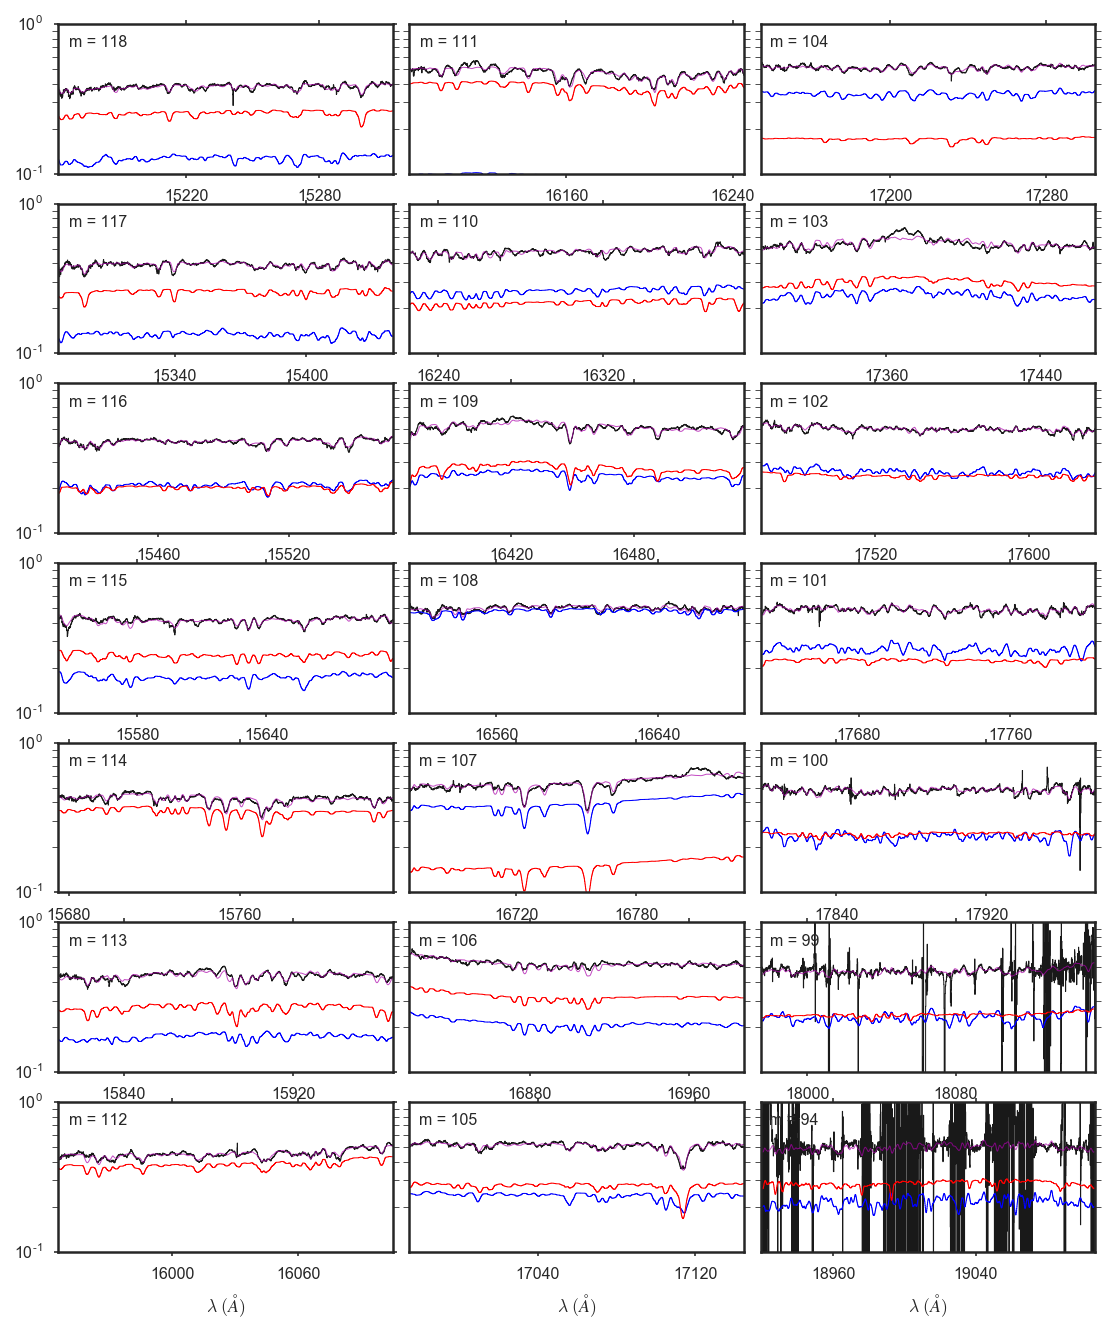

In [13]:
ms = np.arange(99, 118+1, 1)[::-1]
ms = np.append(ms, 94)
ii = -1
nrows = 7
ncols = 3

#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8.0, 11.0))

fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

for i in range(ncols):
    for j in range(nrows):
        ii += 1

        m = ms[ii]
        with open('../sf/m{:03d}/output/mix_emcee/run01/mix_spec.json'.format(m)) as f:
            dat = json.load(f)
        ax = fig.add_subplot(nrows, ncols, ncols * j + 1 + i)
        lw=0.5
        ax.step(dat['wl'], dat['data'], '-k', linewidth=lw, alpha=0.9)
        ax.plot(dat['wl'], dat['composite'], color='#AA00AA', linewidth=lw, alpha=0.7)
        ax.step(dat['wl'], dat['model2_cool'], 'b-', linewidth=lw)
        ax.step(dat['wl'], dat['model1_hot'], 'r', linewidth=lw)

        ax.text(dat['wl'][0]+5.0, 0.7, "m = {}".format(m), fontsize=8)

        #ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.set_yscale('log')
        ax.set_ylim(0.1, 1.0)
        ax.set_xlim(dat['wl'][0], dat['wl'][-1])
        if i > 0:
            ax.yaxis.set_major_locator(plt.NullLocator())
            ax.yaxis.set_major_formatter(plt.NullFormatter())

        ax.xaxis.set_major_locator(plt.MaxNLocator(3))
        if j > (nrows - 2):
            plt.xlabel(r'$\lambda \; (\AA)$')

plt.savefig('../document/figures/H_band_spectra_3x7.pdf', bbox_inches='tight')

Now combine for all orders...

# The end.